<br>

# Titanic Data Analysis and Neural Network Model

### Data Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.PassengerId

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [6]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


<br><br>

## Data Analysis

### Survived

In [7]:
df.Survived.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [8]:
df.Survived.isnull().sum()

0

In [9]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

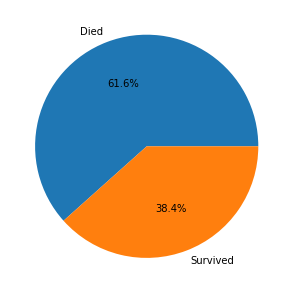

In [10]:
plt.figure(figsize=(5,8))

# sns.histplot(df.Survived, legend=True)
plt.pie(df.Survived.value_counts(), labels=['Died', 'Survived'], autopct='%1.1f%%')

plt.show()

<br><br>

### Pclass

In [11]:
df.Pclass.head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [12]:
df.Pclass.isnull().sum()

0

In [13]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Figure size 360x576 with 0 Axes>

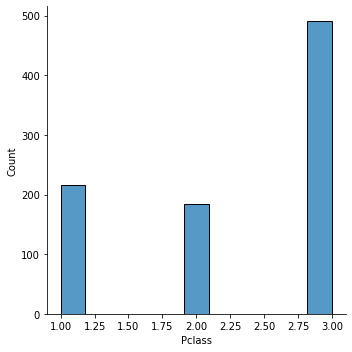

In [14]:
plt.figure(figsize=(5, 8))

sns.displot(df.Pclass)

plt.show()

In [15]:
df[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass'>

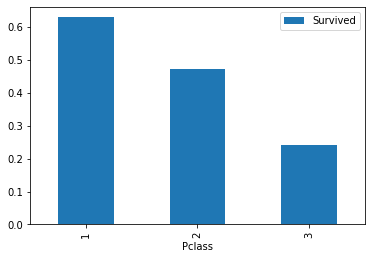

In [16]:
df[['Pclass', 'Survived']].groupby('Pclass').mean().plot(kind='bar')

Most of the first class survived

<br><br>

### Sex

In [17]:
df.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [18]:
df.Sex.isnull().sum()

0

In [19]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

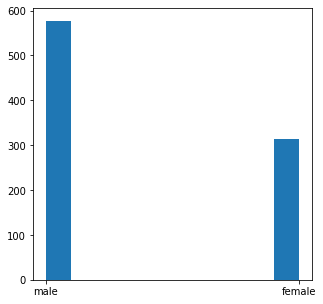

In [20]:
plt.figure(figsize=(5, 5))

plt.hist(df.Sex)

plt.show()

In [21]:
df[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='Sex'>

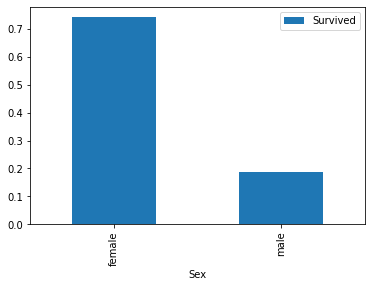

In [22]:
df[['Sex', 'Survived']].groupby('Sex').mean().plot(kind='bar')

Females had a bigger chance to survive

<br><br>

### Age

In [23]:
df.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [24]:
df.Age.isnull().sum()

177

In [25]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

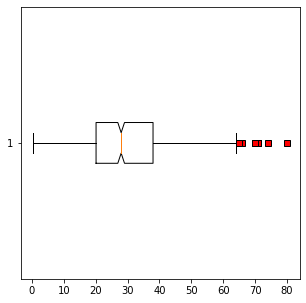

In [26]:
plt.figure(figsize=(5,5))

red_square = dict(markerfacecolor='r', marker='s')
plt.boxplot(df.Age[df.Age.notna()], vert=False, flierprops=red_square, notch=True)

plt.show()

<br><br>

### SibSp

In [27]:
df.SibSp.head()

0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64

In [28]:
df.SibSp.isnull().sum()

0

In [29]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

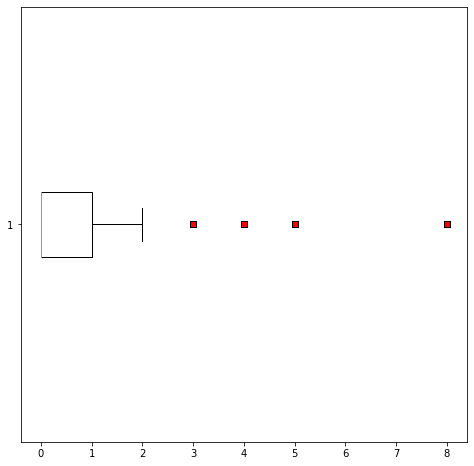

In [30]:
plt.figure(figsize=(8,8))

plt.boxplot(df.SibSp, vert=False, flierprops=red_square)

plt.show()

In [31]:
df[['SibSp', 'Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


<AxesSubplot:xlabel='SibSp'>

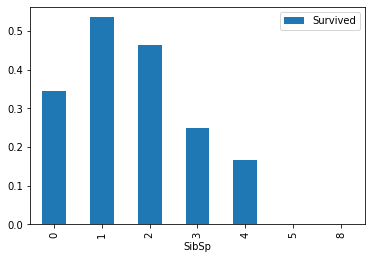

In [32]:
df[['SibSp', 'Survived']].groupby('SibSp').mean().plot(kind='bar')

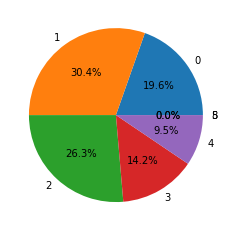

In [33]:
plt.figure()

plt.pie(df[['SibSp', 'Survived']].groupby('SibSp').mean()['Survived'], labels=df[['SibSp', 'Survived']].groupby('SibSp').mean().index, autopct='%1.1f%%')

plt.show()

<br><br>

### Parch

In [34]:
df.Parch.head()

0    0
1    0
2    0
3    0
4    0
Name: Parch, dtype: int64

In [35]:
df.Parch.isnull().sum()

0

In [36]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

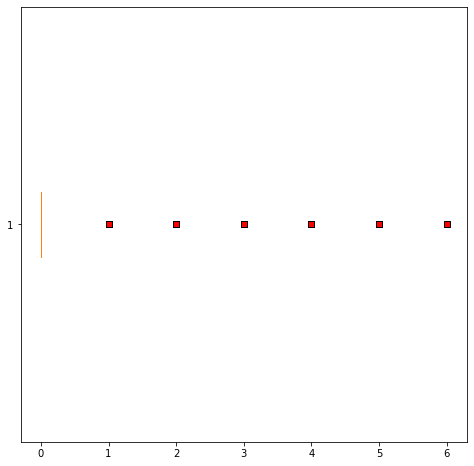

In [37]:
plt.figure(figsize=(8,8))
plt.boxplot(df.Parch, vert=False, flierprops=red_square)
plt.show()

In [38]:
df[['Parch', 'Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


<AxesSubplot:xlabel='Parch'>

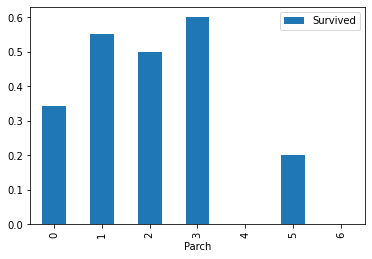

In [39]:
df[['Parch', 'Survived']].groupby('Parch').mean().plot(kind='bar')

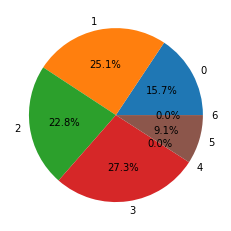

In [40]:
plt.figure()

plt.pie(df[['Parch', 'Survived']].groupby('Parch').mean()['Survived'], labels=df[['Parch', 'Survived']].groupby('Parch').mean().index, autopct='%1.1f%%')

plt.show()

<br><br>

### Fare

In [41]:
df.Fare.head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [42]:
df.Fare.isnull().sum()

0

In [43]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

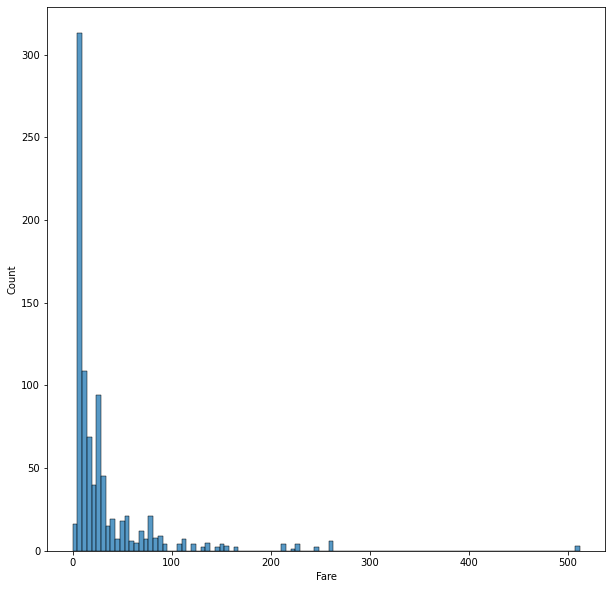

In [44]:
plt.figure(figsize=(10,10))
sns.histplot(df.Fare)
plt.show()

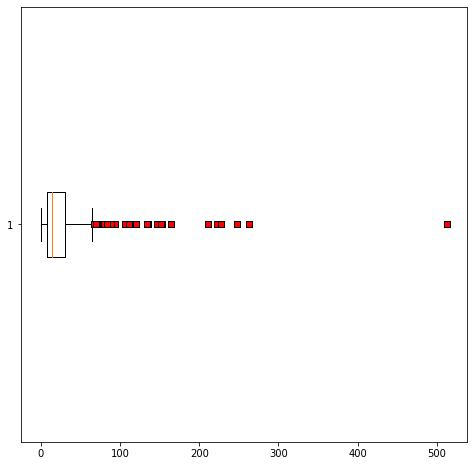

In [45]:
plt.figure(figsize=(8,8))
plt.boxplot(df.Fare, vert=False, flierprops=red_square)
plt.show()

In [46]:
df[['Fare', 'Survived']].groupby('Survived').mean()

,Fare
Survived,
0,22.117887
1,48.395408


<br><br>

### Embarked

In [47]:
df.Embarked.head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [48]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:>

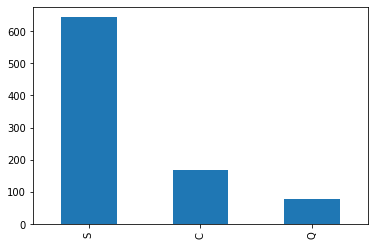

In [49]:
df.Embarked.value_counts().plot(kind='bar')

In [50]:
df[['Embarked', 'Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<AxesSubplot:xlabel='Embarked'>

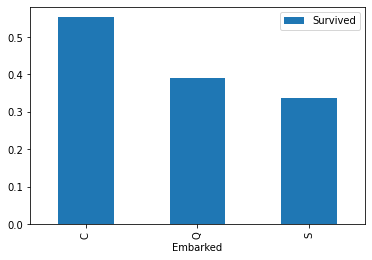

In [51]:
df[['Embarked', 'Survived']].groupby('Embarked').mean().plot(kind='bar')

<br><br>

## Data Encoding

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [53]:
from sklearn.preprocessing import LabelEncoder

gender_encoder = LabelEncoder()
df.Sex = gender_encoder.fit_transform(df.Sex)

In [54]:
df.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [55]:
embarked_encoder = LabelEncoder()
df.Embarked[df.Embarked.notna()] = embarked_encoder.fit_transform(df.Embarked[df.Embarked.notna()])

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
df.Embarked.value_counts()

2    644
0    168
1     77
Name: Embarked, dtype: int64

In [57]:
df.Embarked.isnull().sum()

2

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 52.3+ KB


In [59]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


<br><br>

## Data Imputation

In [60]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()

In [61]:
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,27.0,0.0,0.0,13.0000,2.0
887,1.0,1.0,0.0,19.0,0.0,0.0,30.0000,2.0
888,0.0,3.0,0.0,26.8,1.0,2.0,23.4500,2.0
889,1.0,1.0,1.0,26.0,0.0,0.0,30.0000,0.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    float64
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    float64
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(8)
memory usage: 55.8 KB


In [63]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<br><br>

## Features Correlation

In [64]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.110139,-0.035322,0.081629,0.257307,-0.172493
Pclass,-0.338481,1.000000,0.131900,-0.361589,0.083081,0.018443,-0.549500,0.168109
Sex,-0.543351,0.131900,1.000000,0.138962,-0.114631,-0.245489,-0.182333,0.113505
Age,-0.110139,-0.361589,0.138962,1.000000,-0.216218,-0.184002,0.092564,-0.014569
SibSp,-0.035322,0.083081,-0.114631,-0.216218,1.000000,0.414838,0.159651,0.070028
Parch,0.081629,0.018443,-0.245489,-0.184002,0.414838,1.000000,0.216225,0.041628
Fare,0.257307,-0.549500,-0.182333,0.092564,0.159651,0.216225,1.000000,-0.228257
Embarked,-0.172493,0.168109,0.113505,-0.014569,0.070028,0.041628,-0.228257,1.000000


<AxesSubplot:>

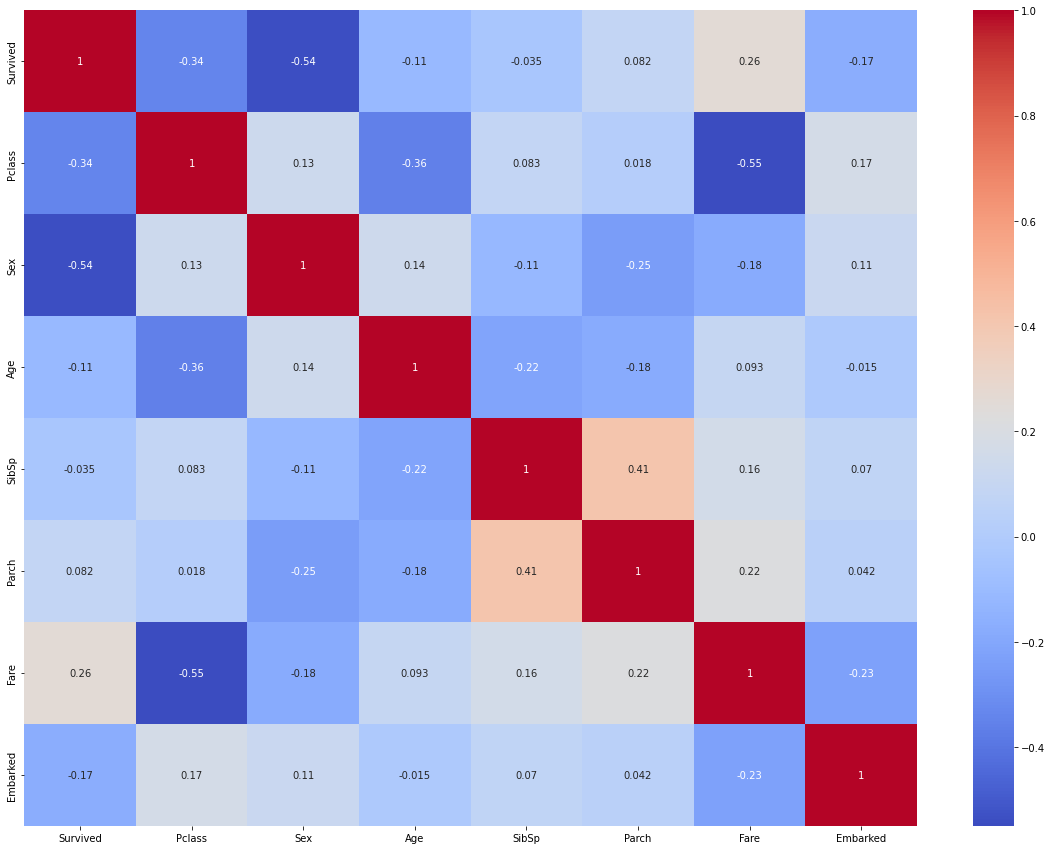

In [65]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [66]:
# Controlam corelatia dintre coloane mai mare ca 0.80
data = df.corr()
data = data[abs(data) > 0.80].stack().reset_index()
data[data['level_0'] != data['level_1']]

,level_0,level_1,0


In [67]:
# Controlam corelatia dintre coloane mai mare ca 0.5
data = df.corr()
data = data[abs(data) < 0.1].stack().reset_index()
data[data['level_0'] == 'Survived']

,level_0,level_1,0
0,Survived,SibSp,-0.035322
1,Survived,Parch,0.081629


In [68]:
df1 = df.drop(columns=['SibSp', 'SibSp'])
df1

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0.0,3.0,1.0,22.0,0.0,7.2500,2.0
1,1.0,1.0,0.0,38.0,0.0,71.2833,0.0
2,1.0,3.0,0.0,26.0,0.0,7.9250,2.0
3,1.0,1.0,0.0,35.0,0.0,53.1000,2.0
4,0.0,3.0,1.0,35.0,0.0,8.0500,2.0
...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,27.0,0.0,13.0000,2.0
887,1.0,1.0,0.0,19.0,0.0,30.0000,2.0
888,0.0,3.0,0.0,26.8,2.0,23.4500,2.0
889,1.0,1.0,1.0,26.0,0.0,30.0000,0.0


In [69]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,30.068411,0.523008,0.381594,32.204208,1.533333
std,0.486592,0.836071,0.477990,13.649375,1.102743,0.806057,49.693429,0.792493
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


<br><br>

## Neural Network

In [70]:
import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader

In [71]:
#Choosing devise to be gpu if have one, else cpu
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")  

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\torch\cuda\__init__.py:80: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 6050). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


In [72]:
class DataSet(Dataset):
    def __init__(self, df):
        self.dataset = torch.tensor(df.values)
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, index):
        return self.dataset[index, 1:], self.dataset[index, 0]

In [73]:
class Net(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.in_features = in_features
        
        self.fc1 = nn.Linear(in_features, 16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, X):
        out = F.relu(self.fc1(X))
        out = F.relu(self.fc2(out))
        out = torch.sigmoid(self.fc3(out))
        
        return out

In [74]:
def fit(num_epochs, model, optimizer, loss_fn, train_loader, test_loader, plot=True):
    train_accuracy = torch.zeros(num_epochs)
    test_accuracy = torch.zeros(num_epochs)
    
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_loader:
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            
            y_batch = torch.unsqueeze(y_batch, 1)
            
            prediction = model(x_batch.float())
            loss = loss_fn(prediction, y_batch.float())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        with torch.no_grad():
            for loader, accuracy in [(train_loader, train_accuracy), (test_loader, test_accuracy)]:
                total = 0
                correct = 0
                for x_batch, y_batch in loader:
                    x_batch = x_batch.to(DEVICE)
                    y_batch = y_batch.to(DEVICE).view(-1, 1)

                    # y_batch = torch.unsqueeze(y_batch, 1)

                    prediction = torch.round(model(x_batch.float()))
                    total += len(x_batch)
                    correct += torch.sum(prediction == y_batch)

                accuracy[epoch] = correct / total
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch : {epoch+1}, accuracy : {test_accuracy[epoch]}')
    
    if plot:
        plt.figure(figsize=(10,10))
        
        plt.plot(train_accuracy, label='train_accuracy')
        plt.plot(test_accuracy, label='test_accuracy')
        
        plt.legend()
        plt.title('Accuracy during training')
        
        plt.show()

In [75]:
torch.tensor(df.values)

tensor([[ 0.0000,  3.0000,  1.0000,  ...,  0.0000,  7.2500,  2.0000],
        [ 1.0000,  1.0000,  0.0000,  ...,  0.0000, 71.2833,  0.0000],
        [ 1.0000,  3.0000,  0.0000,  ...,  0.0000,  7.9250,  2.0000],
        ...,
        [ 0.0000,  3.0000,  0.0000,  ...,  2.0000, 23.4500,  2.0000],
        [ 1.0000,  1.0000,  1.0000,  ...,  0.0000, 30.0000,  0.0000],
        [ 0.0000,  3.0000,  1.0000,  ...,  0.0000,  7.7500,  1.0000]],
       dtype=torch.float64)

<br>

#### Using the first dataframe

In [76]:
# Set seed
seed = 42
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

dataset = DataSet(df)

n_samples = len(dataset)
n_test = int(n_samples * 0.2)

#Spliting into train and validation
train_set, test_set = torch.utils.data.random_split(dataset,  [n_samples-n_test, n_test])


test_loader = DataLoader(test_set, batch_size=len(test_set), shuffle = True)
train_loader = DataLoader(train_set, batch_size=len(train_set), shuffle = True)

In [77]:
lr = 1e-2

model = Net(7)
loss_fn = F.mse_loss
optimizer = optim.Adam(model.parameters(), lr)

Epoch : 10, accuracy : 0.6404494643211365
Epoch : 20, accuracy : 0.6629213690757751
Epoch : 30, accuracy : 0.6797752976417542
Epoch : 40, accuracy : 0.6853932738304138
Epoch : 50, accuracy : 0.7247191071510315
Epoch : 60, accuracy : 0.7415730357170105
Epoch : 70, accuracy : 0.7640449404716492
Epoch : 80, accuracy : 0.7921348214149475
Epoch : 90, accuracy : 0.8089887499809265
Epoch : 100, accuracy : 0.8370786309242249
Epoch : 110, accuracy : 0.8258426785469055
Epoch : 120, accuracy : 0.8089887499809265
Epoch : 130, accuracy : 0.8146067261695862
Epoch : 140, accuracy : 0.8146067261695862
Epoch : 150, accuracy : 0.8146067261695862


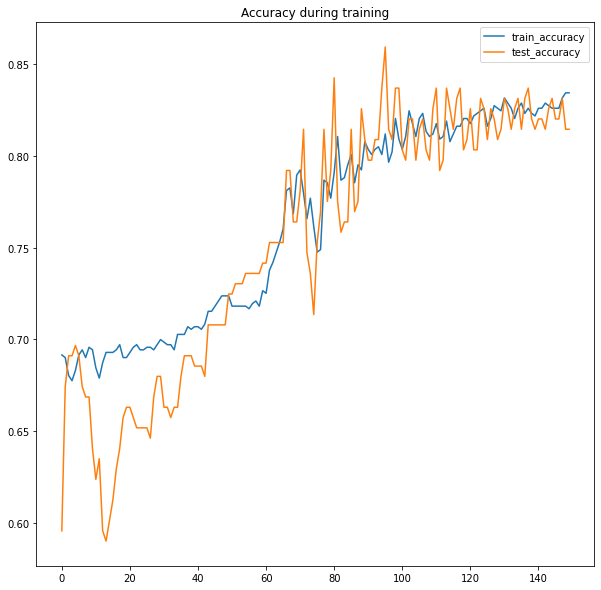

In [78]:
fit(num_epochs=150, model=model, optimizer=optimizer, loss_fn=loss_fn, train_loader=train_loader, test_loader=test_loader)

<br>

#### Using the second dataframe

In [79]:
df1.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [80]:
# Set seed
seed = 42
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

dataset = DataSet(df1)

n_samples = len(dataset)
n_test = int(n_samples * 0.2)

#Spliting into train and validation
train_set, test_set = torch.utils.data.random_split(dataset,  [n_samples-n_test, n_test])

train_loader = DataLoader(train_set, batch_size=len(train_set), shuffle = True)
test_loader = DataLoader(test_set, batch_size=len(test_set), shuffle = True)

In [81]:
lr = 1e-2

model2 = Net(6)
loss_fn = F.mse_loss
optimizer = optim.Adam(model2.parameters(), lr)

Epoch : 10, accuracy : 0.6741573214530945
Epoch : 20, accuracy : 0.6460674405097961
Epoch : 30, accuracy : 0.6573033928871155
Epoch : 40, accuracy : 0.7022472023963928
Epoch : 50, accuracy : 0.7247191071510315
Epoch : 60, accuracy : 0.7584269642829895
Epoch : 70, accuracy : 0.7471910119056702
Epoch : 80, accuracy : 0.8202247023582458
Epoch : 90, accuracy : 0.8595505356788635
Epoch : 100, accuracy : 0.7921348214149475
Epoch : 110, accuracy : 0.8089887499809265
Epoch : 120, accuracy : 0.7808988690376282
Epoch : 130, accuracy : 0.8258426785469055
Epoch : 140, accuracy : 0.7808988690376282
Epoch : 150, accuracy : 0.7921348214149475


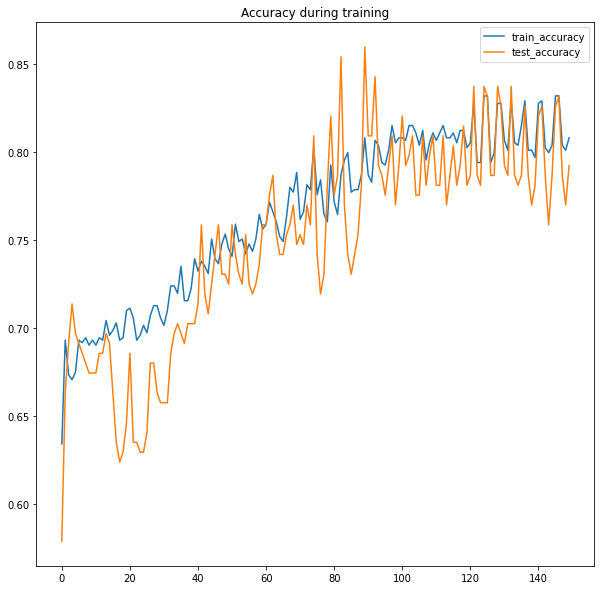

In [82]:
fit(num_epochs=150, model=model2, optimizer=optimizer, loss_fn=loss_fn, train_loader=train_loader, test_loader=test_loader)